In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


train = pd.read_csv("/Users/dishabhatnagar/Desktop/Text Mining/spooky-author-identification/train.csv")
test = pd.read_csv('/Users/dishabhatnagar/Desktop/Text Mining/spooky-author-identification/test.csv')


In [36]:
train.shape

(19579, 3)

In [3]:
train.isnull().sum()


id        0
text      0
author    0
dtype: int64

In [4]:
train.author.value_counts().index


Index(['EAP', 'MWS', 'HPL'], dtype='object')

In [ ]:
## Inspect text length

In [5]:
document_lengths = np.array(list(map(len, train.text.str.split(' '))))


In [6]:
print("The average number of words in a document is: {}.".format(np.mean(document_lengths)))
print("The minimum number of words in a document is: {}.".format(min(document_lengths)))
print("The maximum number of words in a document is: {}.".format(max(document_lengths)))

The average number of words in a document is: 26.730476530977068.
The minimum number of words in a document is: 2.
The maximum number of words in a document is: 861.


In [7]:
print("There are {} documents with over 150 words.".format(sum(document_lengths > 150)))

shorter_documents = document_lengths[document_lengths <= 150]

There are 16 documents with over 150 words.


In [ ]:
## Document with top 5 words

In [8]:
print("There are {} documents with tops 5 words.".format(sum(document_lengths <= 5)))

There are 452 documents with tops 5 words.


In [9]:
train[document_lengths == 2]


,id,text,author
6936,id22015,"""PIQUANT EXPRESSIONS.",EAP
9250,id23640,"""EXTRAORDINARY MURDERS.",EAP
18064,id05139,Shakespeare's Sonnets.,MWS
18127,id20376,Shakspeare's Sonnets.,MWS


In [10]:
train[document_lengths == 3]


,id,text,author
2403,id04385,"Yours everlastingly, PUNDITA.",EAP
2460,id04068,Distinguished several words.,EAP
2888,id13751,Everyone loved Elizabeth.,MWS
3076,id21984,This thought creates.,EAP
4016,id17846,The uproar increases.,EAP
4961,id17197,""" Odenheimer, restaurateur.",EAP
6394,id21456,Idris had disappeared.,MWS
6418,id27928,"""Sunday, the seventh.",EAP
8652,id26614,Cats they caterwauled.,EAP
8764,id16503,He dislikes children.,EAP


In [11]:
# Classify by author
EAP = train[train['author']=='EAP']
MWS = train[train['author']=='MWS']
HPL = train[train['author']=='HPL']

(-0.5, 399.5, 199.5, -0.5)

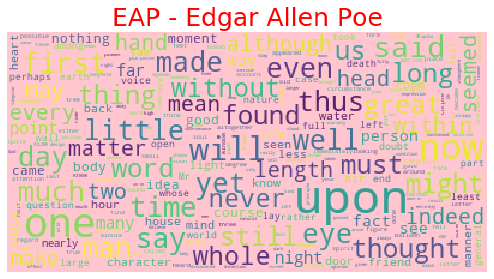

In [29]:
plt.figure(figsize=(20,15))
plt.subplot(311)
wc = WordCloud(background_color="pink", max_words=10000,
               stopwords=STOPWORDS, max_font_size= 40)

wc.generate(" ".join(EAP.text))
plt.title("EAP - Edgar Allen Poe", fontsize=25, color = 'red')
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), alpha=0.9)
plt.axis('off')



(-0.5, 399.5, 199.5, -0.5)

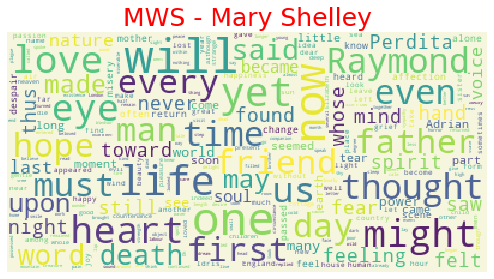

In [33]:
plt.figure(figsize=(20,15))
plt.subplot(312)
wc = WordCloud(background_color="beige", max_words=10000,
               stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(MWS.text))
plt.title("MWS - Mary Shelley", fontsize=25, color = 'red')
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), alpha=0.9)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

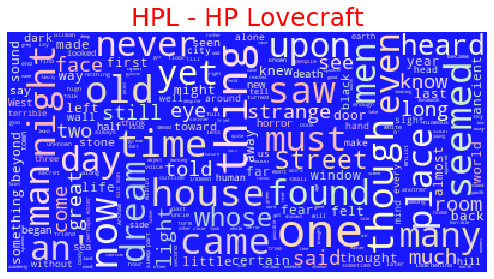

In [28]:
plt.figure(figsize=(20,15))
plt.subplot(313)
wc = WordCloud(background_color="blue", max_words=10000,
               stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(HPL.text))
plt.title("HPL - HP Lovecraft", fontsize=25, color = 'red')
plt.imshow(wc.recolor(colormap = 'Pastel1', random_state=17), alpha=0.9)
plt.axis('off')